In [170]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [30]:
data = pd.read_csv('finaldf.csv',)

In [31]:
data

,DATE,wage,gdp,unemp,homes_sold,new_homes,price,interest
0,2000-06-30,606.0,101.723684,3.933333,305.333333,4.533333,104.050500,6.271978
1,2000-09-30,611.0,101.580894,4.000000,301.666667,4.166667,105.786000,6.519457
2,2000-12-31,614.0,101.176684,3.900000,301.333333,3.933333,108.274667,6.474891
3,2001-03-31,620.0,100.639951,4.233333,294.666667,3.766667,110.484667,5.597000
4,2001-06-30,624.0,100.115880,4.400000,296.666667,4.033333,112.203333,4.326703
...,...,...,...,...,...,...,...,...
84,2021-06-30,1048.0,99.278502,5.900000,331.000000,5.300000,254.633000,0.068242
85,2021-09-30,1068.0,99.829101,5.100000,370.333333,6.200000,266.878333,0.090000
86,2021-12-31,1069.0,100.231186,4.233333,388.666667,6.233333,276.591000,0.079457
87,2022-03-31,1100.0,100.059628,3.800000,400.333333,6.233333,290.544667,0.121444


In [ ]:
data['DATE']

In [160]:
X_1 = data.drop(['DATE','price'],axis=1)

In [80]:
y = data['price']

In [135]:
scaler = StandardScaler()

In [137]:
X = scaler.fit_transform(X)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

In [140]:
model = LinearRegression()

In [141]:
model.fit(X_train,y_train)

LinearRegression()

In [142]:
preds = model.predict(X_test)

In [143]:
predf = pd.DataFrame(data = preds,columns={'preds'})

In [144]:
predf['ytest'] = y_test

In [145]:
mean_squared_error(preds,y_test)

210.77914667269692

In [146]:
model.score(X_train,y_train)

0.9760881929391834

In [147]:
model.score(X_test,y_test)

0.8216127671868516

In [148]:
model.coef_

array([43.16318583, -0.1501309 ,  0.98577775, 21.36256985, -4.58015239,
       -0.59888072])

In [152]:
predf = pd.DataFrame(data=y_test)

In [153]:
predf['preds'] = preds

In [154]:
predf

,price,preds
62,175.700667,178.032593
63,177.720667,181.517423
64,179.439000,183.842456
65,181.851000,186.021432
66,184.727000,190.302243
67,187.379333,196.269792
68,189.682333,198.260143
69,192.669333,198.735949
70,195.896000,199.003562
71,199.141000,206.071051


<AxesSubplot:>

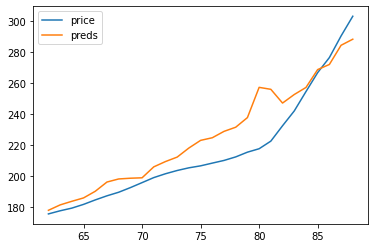

In [155]:
predf.plot()

In [156]:
imp = model.coef_

In [161]:
cols =X_1.columns

In [163]:
feat_imp = pd.DataFrame(data=imp)

In [164]:
feat_imp['features'] = cols

In [165]:
feat_imp

,0,features
0,43.163186,wage
1,-0.150131,gdp
2,0.985778,unemp
3,21.362570,homes_sold
4,-4.580152,new_homes
5,-0.598881,interest


<AxesSubplot:xlabel='features', ylabel='0'>

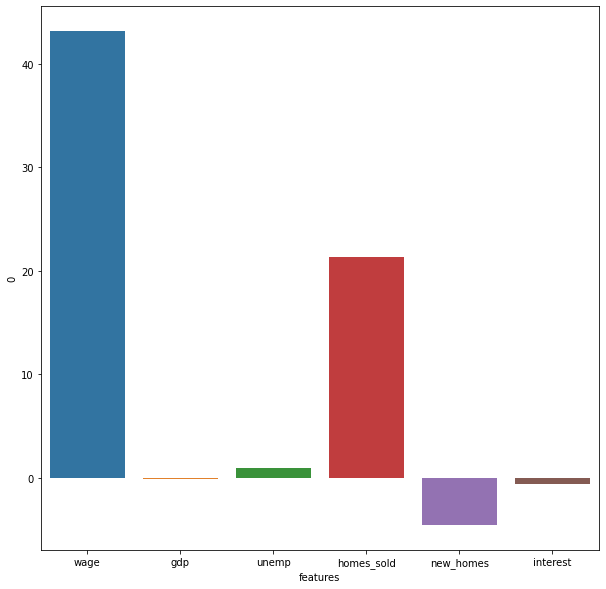

In [169]:
plt.figure(figsize=(10,10))
sns.barplot(x=feat_imp['features'],y=feat_imp[0])

In [174]:
importances = pd.DataFrame(data={
    'Attribute': X_1.columns,
    'Importance': model_x.feature_importances_
})

In [175]:
importances

,Attribute,Importance
0,wage,0.280592
1,gdp,0.124128
2,unemp,0.244292
3,homes_sold,0.320053
4,new_homes,0.018780
5,interest,0.012155


<AxesSubplot:xlabel='Attribute', ylabel='Importance'>

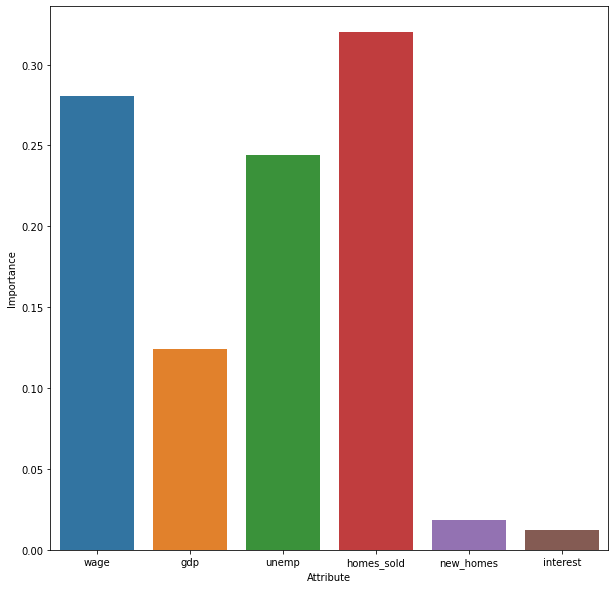

In [180]:
plt.figure(figsize=(10,10))
sns.barplot(x=importances['Attribute'],y=importances['Importance'])

In [184]:
df['price'] = data['price']

<AxesSubplot:>

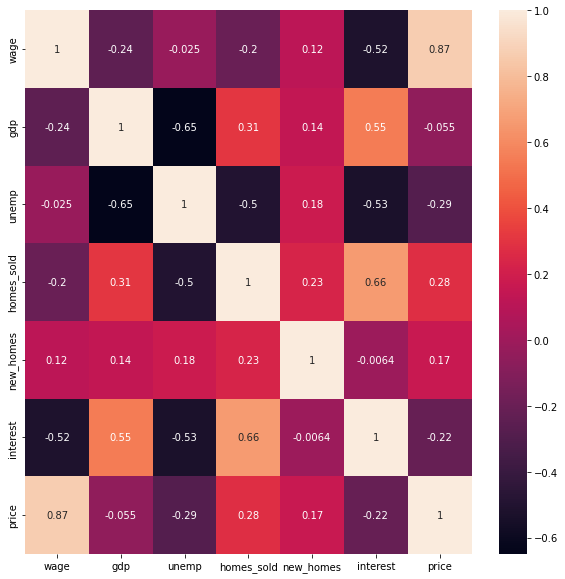

In [187]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)